In [1]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
record_json = './report_models/v1/20230213-19:50/results/v4.json'
image_dir = '/datasets/kf1d20/Indiana_data/content/NLMCXR_png/'

with open(record_json, 'r') as f:
    data = json.load(f)

In [3]:
def show_image(image_id):
    image = mpimg.imread(os.path.join(image_dir, image_id))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def get_real_tags(item):
    array = []
    for each in item['Real Tags']:
        if each in item['Pred Tags']:
            array.append("\033[4;35m{}\033[0m".format(each))
        else:
            array.append(each)
    return ', '.join(array)

def get_pred_tags(item):
    return ', '.join(item['Pred Tags'])

def get_sentence(item):
    real_sents = []
    pred_sents = []
    for i in range(max(len(item['Real Sent']), len(item['Pred Sent']))):
#         print("Sentence {}:".format(i))
        try:
            real_sent = item['Real Sent'][str(i)]
        except Exception as _:
            real_sent = ""
        try:
            pred_sent = item['Pred Sent'][str(i)]
        except Exception as _:
            pred_sent = ""
        
#         print("Real: {}".format(real_sent))
#         print("Pred: {}".format(pred_sent))
#         print("")
        real_sents.append(real_sent)
        pred_sents.append(pred_sent)
    print("Real Sents:{}".format(". ".join(real_sents)))
    print("Pred Sents:{}".format('. '.join(pred_sents)))

def get_tags_peformance(data):
    num_ground_truth = 0
    num_pred_all = 0
    num_pred_truth = 0
    for each in data:
        num_ground_truth += len(data[each]['Real Tags'])
        num_pred_all += len(data[each]['Pred Tags'])
        for tag in data[each]['Pred Tags']:
            if tag in data[each]['Real Tags']:
                num_pred_truth += 1
    return num_pred_truth / num_ground_truth * 1.0, num_pred_truth / num_pred_all * 1.0

In [4]:
data

{'CXR1226_IM-0150-1002.png': {'Real Tags': ['pneumonia',
   'right lower lobe pneumonia'],
  'Pred Tags': ['opacity',
   'atelectasis',
   'atelectases',
   'normal',
   'diaphragm',
   'pleural effusion',
   'others',
   'nodule',
   'rib fractures',
   'degenerative change'],
  'Pred Sent': {'0': '<num> cardiomegaly and small bilateral pleural effusions <num> abnormal pulmonary opacities most suggestive of pulmonary edema primary differential diagnosis includes infection and aspiration clinical correlation recommended',
   '1': 'the heart is normal in size',
   '2': '<num> cardiomegaly and small bilateral pleural effusions <num> abnormal pulmonary opacities most suggestive of pulmonary edema primary differential diagnosis includes infection and aspiration clinical correlation recommended',
   '3': 'the heart is normal in size',
   '4': 'no pleural effusion or pneumothorax is seen',
   '5': 'no focal consolidation pleural effusion or pneumothorax identified'},
  'Real Sent': {'0': 'ri

In [5]:
images_id = []
i=0
for each in data:
    print(each)
    i+=1
    if each=='CXR1954_IM-0622-1001.png':
        print(i)
    images_id.append(each)

CXR1226_IM-0150-1002.png
CXR1866_IM-0559-1001.png
CXR1168_IM-0112-1001.png
CXR182_IM-0531-2001.png
CXR2044_IM-0687-2001.png
CXR2719_IM-1182-1001.png
CXR412_IM-2056-1001.png
CXR3731_IM-1865-2001.png
CXR331_IM-1584-1001.png
CXR2910_IM-1314-1001.png
CXR820_IM-2351-2001.png
CXR2481_IM-1010-12012.png
CXR3058_IM-1425-2002.png
CXR2843_IM-1254-1001-0001.png
CXR3623_IM-1793-1002.png
CXR106_IM-0042-2001.png
CXR1841_IM-0545-1001.png
CXR918_IM-2420-4004.png
CXR2060_IM-0698-1001.png
CXR989_IM-2475-1003002.png
CXR1373_IM-0240-2001.png
CXR1900_IM-0584-2001.png
CXR2259_IM-0850-1001.png
CXR380_IM-1911-2001.png
CXR946_IM-2441-2001.png
CXR1097_IM-0067-1001.png
CXR3969_IM-2030-1001.png
CXR3620_IM-1791-1001-0001.png
CXR2039_IM-0683-1001.png
CXR2796_IM-1228-12012.png
CXR2614_IM-1105-1001.png
CXR2058_IM-0696-1001.png
CXR2108_IM-0738-1002.png
CXR2398_IM-0947-2001.png
CXR3393_IM-1637-2001.png
CXR1272_IM-0183-1001.png
CXR1193_IM-0129-2001.png
CXR3250_IM-1540-1001-0002.png
CXR2428_IM-0970-3001.png
CXR925_IM-2425

In [6]:
recall, precision = get_tags_peformance(data)
print("Recall:{}".format(recall))
print("Precision:{}".format(precision))

Recall:0.5537017726798749
Precision:0.1062


In [7]:
def show_info(id):
    image_id = images_id[id]
    item = data[image_id]
    print("Image:{}".format(image_id))
    show_image(image_id)

    print("Real Tags: {}".format(get_real_tags(item)))
    print("Pred Tags: {}".format(get_pred_tags(item)))
    print("")
    get_sentence(item)

Image:CXR3316_IM-1586-1001.png


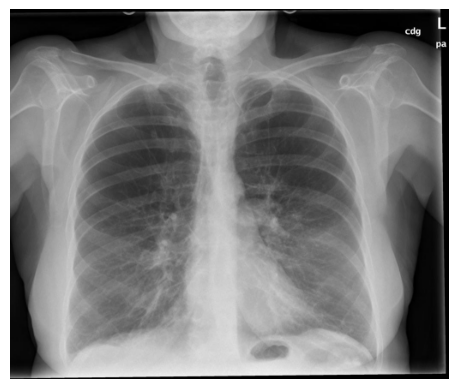

Real Tags: scarring, emphysemas, emphysema, pulmonary emphysema
Pred Tags: pulmonary emphysema, aorta, emphysemas, others, copd, pneumonectomy, emphysema, lobectomy, callus, deformity

Real Sents:no acute cardiopulmonary finding. heart size is normal. no focal airspace disease. bibasilar pleural scarring. no pneumothorax or <unk>. . 
Pred Sents:the heart is normal in size. <num> cardiomegaly and small bilateral pleural effusions <num> abnormal pulmonary opacities most suggestive of pulmonary edema primary differential diagnosis includes infection and aspiration clinical correlation recommended. no acute cardiopulmonary abnormality. no focal consolidation pleural effusion or pneumothorax identified. no focal consolidation pleural effusion or pneumothorax identified. no focal consolidation pleural effusion or pneumothorax identified. 


In [29]:
show_info(61)

Image:CXR801_IM-2335-2001.png


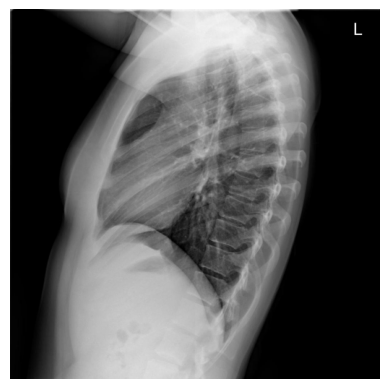

Real Tags: normal
Pred Tags: normal, degenerative change, scarring, others, nodule, opacity, calcified granuloma, pneumonia, foreign body, subcutaneous emphysema

Real Sents:normal chest. heart is normal in size. no focal consolidation pleural effusion or pneumothorax. no acute or destructive bone <unk>. . . 
Pred Sents:no acute cardiopulmonary abnormality. no acute cardiopulmonary abnormality. no acute cardiopulmonary abnormality. no acute bony <unk>. no acute bony <unk>. no acute bony <unk>. 


In [9]:
show_info(40)

Image:CXR3224_IM-1524-2001.png


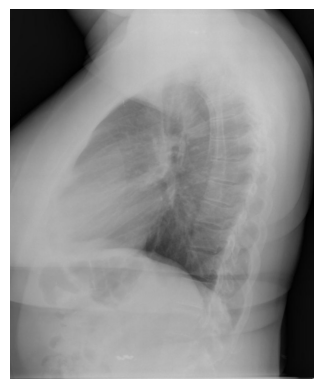

Real Tags: normal
Pred Tags: normal, calcified granuloma, degenerative change, pneumothorax, calcinosis, nodule, catheterization, central venous, lung granuloma, opacity, degenerative disc diseases

Real Sents:negative for acute abnormality. the cardiomediastinal silhouette is normal in size and contour. no focal consolidation pneumothorax or large pleural effusion. negative for acute bone <unk>. . . 
Pred Sents:no acute cardiopulmonary abnormality. no acute cardiopulmonary abnormality. no acute cardiopulmonary abnormality. no acute bony <unk>. no acute bony <unk>. no acute bony <unk>. 


In [10]:
show_info(80)

Image:CXR3171_IM-1494-1001.png


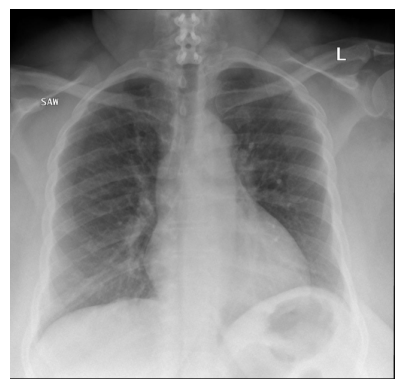

Real Tags: normal
Pred Tags: normal, nodule, opacity, pneumonia, calcified granuloma, plate-like atelectasis, aortic aneurysm, degenerative change, others, lung granuloma

Real Sents:no active disease. the heart and lungs have in the interval. both lungs are clear and expanded. heart and mediastinum <unk>. . . 
Pred Sents:no acute cardiopulmonary abnormality. no acute cardiopulmonary abnormality. no acute cardiopulmonary abnormality. no acute bony <unk>. no acute bony <unk>. no acute bony <unk>. 


In [11]:
show_info(60)